In [1]:
from MAB import GameEngine,ActionRewardAgents as Agents,SimpleMAB
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

%matplotlib inline  


In [13]:
Max_steps = 5000
Repeats_count = 20

Enviroment = SimpleMAB.BernoulliEnviroment([0.1,0.1,0.1,0.1,0.6,0.6,0.6,0.9])
#Enviroment = SimpleMAB.GaussianEnviroment(10,-3,3,1,1)
agents = {
#"Optimistic" : Agents.SimpleAgent(optimistic=1),
#"Simple" : Agents.SimpleAgent(optimistic=0),
#"Random" : Agents.RandomAgent(),
"enGreedy" : Agents.enGreedyAgent(c=0.5,d=0.9),
"UCB" : Agents.UCB1Agent()
}

game = GameEngine.Game(Enviroment, agents,verbose=0)
game.Reset()
logs = game.Play(Max_steps,Repeats_count)

logs.columns

Index(['Action', 'Agent', 'Avg_best_action', 'Avg_pseudo_regret', 'Avg_regret',
       'Avg_reward', 'Best_action_flag', 'Iter', 'N_repeat', 'Regret',
       'Reward', 'Sum_best_action', 'Sum_pseudo_regret', 'Sum_regret',
       'Sum_reward'],
      dtype='object')

In [ ]:
Max_steps = 2000
Repeats_count = 250

Enviroment = SimpleMAB.GaussianEnviroment(10,-3,3,1,1)

agents = {
"Greedy 0" : Agents.SimpleAgent(),
"Greedy 0.01" : Agents.GreedyAgent(greedy=0.01),
"Greedy 0.1" : Agents.GreedyAgent(greedy=0.1)
}

game = GameEngine.Game(Enviroment, agents,verbose=0)
game.Reset()
logs = game.Play(Max_steps,Repeats_count)

logs.columns

In [ ]:
Max_steps = 2000
Repeats_count = 10

Enviroment = SimpleMAB.BernoulliEnviroment(10)

agents = {
"UCB 0" : Agents.UCBAgent(c=0),
"UCB 0.1" : Agents.UCBAgent(c=0.1),
"UCB 0.5" : Agents.UCBAgent(c=0.5),
"UCB 1" : Agents.UCBAgent(c=1)
}

game = GameEngine.Game(Enviroment, agents,verbose=0)
game.Reset()
logs = game.Play(Max_steps,Repeats_count)

logs.columns

In [ ]:
#sns.boxplot(data=Enviroment.getRewardSample())
sns.barplot(data=Enviroment.getRewardSample())

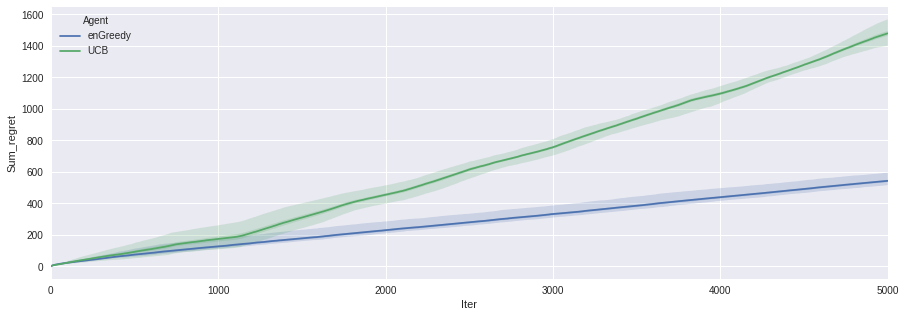

In [10]:
plt.figure(figsize=(15, 5))
sns.tsplot(data=logs, time="Iter", unit="N_repeat",
           condition="Agent", value="Sum_regret", ci=[50,100])


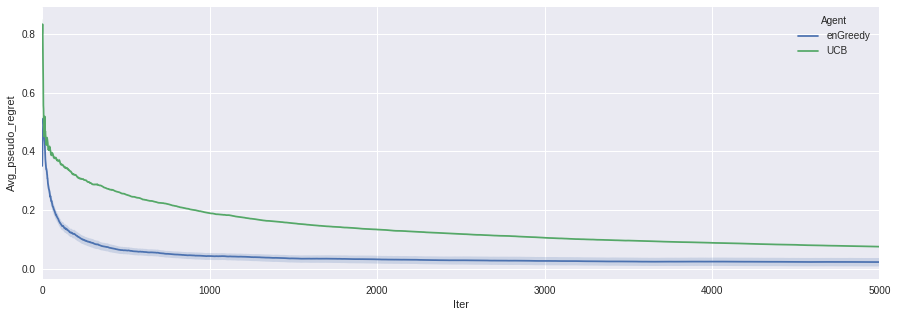

In [15]:
plt.figure(figsize=(15, 5))

sns.tsplot(data=logs, time="Iter", unit="N_repeat",
           condition="Agent", value="Avg_pseudo_regret", ci=[50])


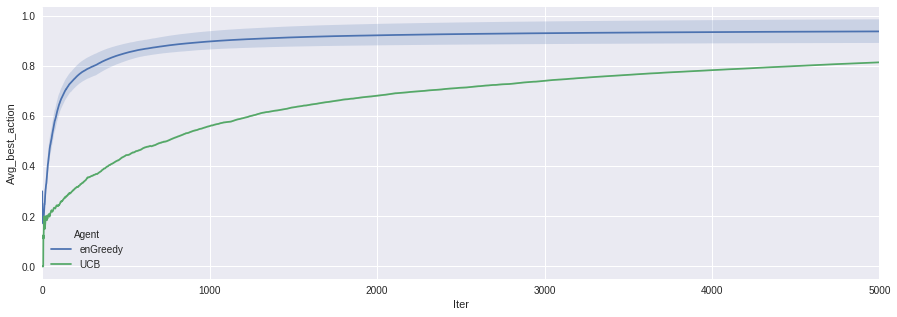

In [14]:
plt.figure(figsize=(15, 5))

sns.tsplot(data=logs, time="Iter", unit="N_repeat",
           condition="Agent", value="Avg_best_action", ci=[50])
